<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Notebook to viz FaIR output </span> 

In [1]:
import os
import pickle
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt


pathDICT = {
    "debug_Path" : "/Users/pk695/werk.M2/FACTS_dev/2401_RFF.SPs/facts_development/facts/experiments.RFF.SPs/debug_rffLL_project",   
}



file=f"{pathDICT['debug_Path']}/project.pkl"

with open(file, "rb") as f:
    loaded_data = pickle.load(f)

# Access each variable
rffemfull_array     = loaded_data["rffemfull_array"]
rff_sp_array        = loaded_data["rff_sp_array"]
#
temps               = loaded_data["temps"]
deeptemps           = loaded_data["deeptemps"]
ohcs                = loaded_data["ohcs"]



file=f"{pathDICT['debug_Path']}/rff.LL.temperature.fair.rffLL_preprocess.pkl"
with open(file, 'rb') as f:
	preprocess_data = pickle.load(f)

emis	 			= preprocess_data["emis"]
rffemissions	 	= preprocess_data["rffemissions"]
REFERENCE_YEAR 	    = preprocess_data["REFERENCE_YEAR"]
t 					= np.arange(REFERENCE_YEAR, 2501)

# pairds 			    = preprocess_data["pairds"]
# scenario 		    = preprocess_data["scenario"]
# rcmip_file 		    = preprocess_data["rcmip_file"]





# print('\n <======>')
# print('rffemissions = ',rffemissions)
# print('<======>')
# print('emis shape:: ',emis.shape)
# print('<======>')
# print(f"rffemfull_array shape:: {rffemfull_array.shape}")
# print('<======>')



rffemissionsGASIDX={
    "C": 0,
    "CH4": 1,
    "N2": 2 }

emisGASIDX={
    "C": 1,
    "CH4": 3,
    "N2O": 4,
    "N2": 4 }

/var/folders/gp/3_y9nhmx1_q9m81jy_j7f8ddyrdbs6/T/ipykernel_40282/4259964932.py:31: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  preprocess_data = pickle.load(f)


1. `rffemissions` has 3 gasses - 'C' 'CH4' 'N2' , IDX (0,1,2)

1. `emis` and `rffemfull_array` have at "C" ,"CH4" ,"N2O" ,"N2" , IDX (1,3,4,4)
    * first column is time. 

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR IP  </span> 

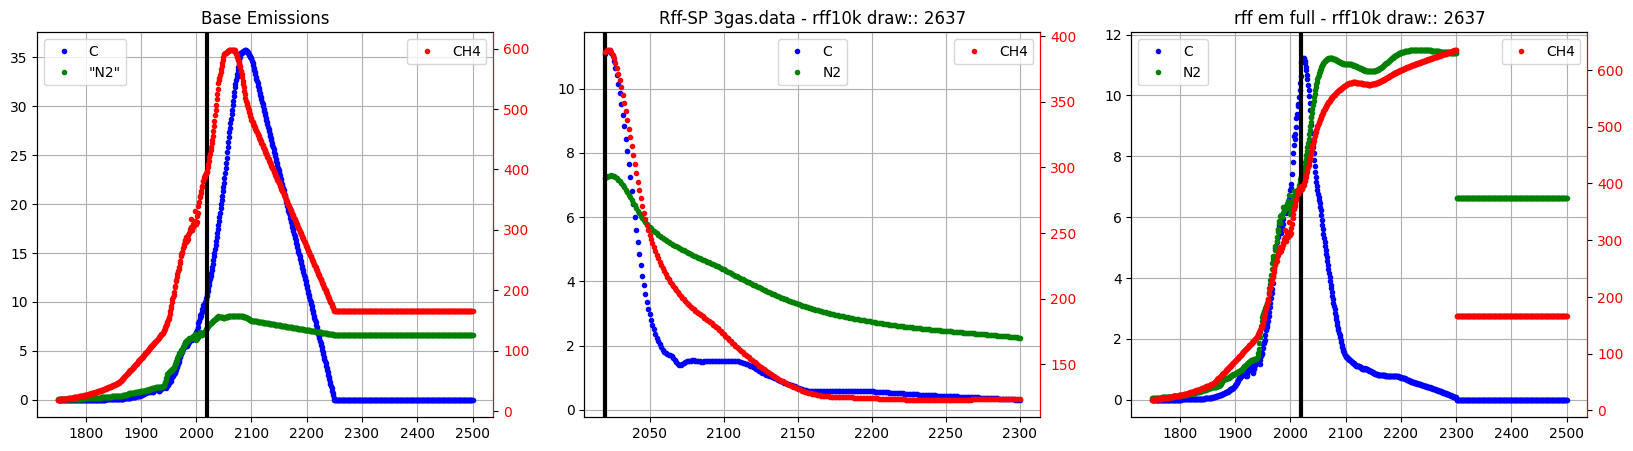

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))



# ===========> PLOT emis
ax0=axs[0]
title="Base Emission" # (40 gas species)
# C -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["C"]],'.b',label='C'); 
# CH4-->
ax00 = ax0.twinx()
ax00.plot(emis[:,0] , emis[:,emisGASIDX["CH4"]],'.r',label='CH4'); 
ax00.tick_params(axis='y', labelcolor='r'); ax00.spines['right'].set_color('r')
# N2 --> 
ax0.plot(emis[:,0] , emis[:,emisGASIDX["N2"]],'.g',label='"N2"'); 
# Ax properties
ax0.legend(loc="upper left"); ax00.legend(loc="upper right")
axs[0].set_title(f'Base Emissions'); ax0.grid(True)

# ===========>
sample=0

# ===========> PLOT rffemissions (3gas)
rffspIDX=rff_sp_array[sample].item()
ax1=axs[1]
# C
ax1.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["C"],rffspIDX,:],'.b',label='C'); 
# CH4
ax11 = ax1.twinx()
ax11.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["CH4"],rffspIDX,:],'.r',label='CH4'); 
ax11.tick_params(axis='y', labelcolor='r'); ax11.spines['right'].set_color('r')
# N2
ax1.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["N2"],rffspIDX,:],'.g',label='N2'); 
# Ax properties
ax1.legend(loc="upper center"); ax11.legend(loc="upper right")
axs[1].set_title(f'Rff-SP 3gas.data - rff10k draw:: {rffspIDX}'); ax1.grid(True)


# ===========> PLOT # New Emission (40 gas species)

ax2=axs[2]
# C
ax2.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["C"]],'.b',label='C'); 
# CH4
ax22 = ax2.twinx()
ax22.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["CH4"]],'.r',label='CH4'); 
ax22.tick_params(axis='y', labelcolor='r'); ax22.spines['right'].set_color('r')
# N2
ax2.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["N2"]],'.g',label='N2'); 
# Ax properties
ax2.legend(loc="upper left"); ax22.legend(loc="upper right")
ax2.set_title(f'rff em full - rff10k draw:: {rffspIDX}'); ax2.grid(True)

for ii in range(3): axs[ii].axvline(x=2020, color='black', linestyle='-', linewidth=3)
# for ii in range(3):  axs[ii].set_xlim(2020,2300); 


**I dont understand these plots fully.**    
    - Indexing Issue?

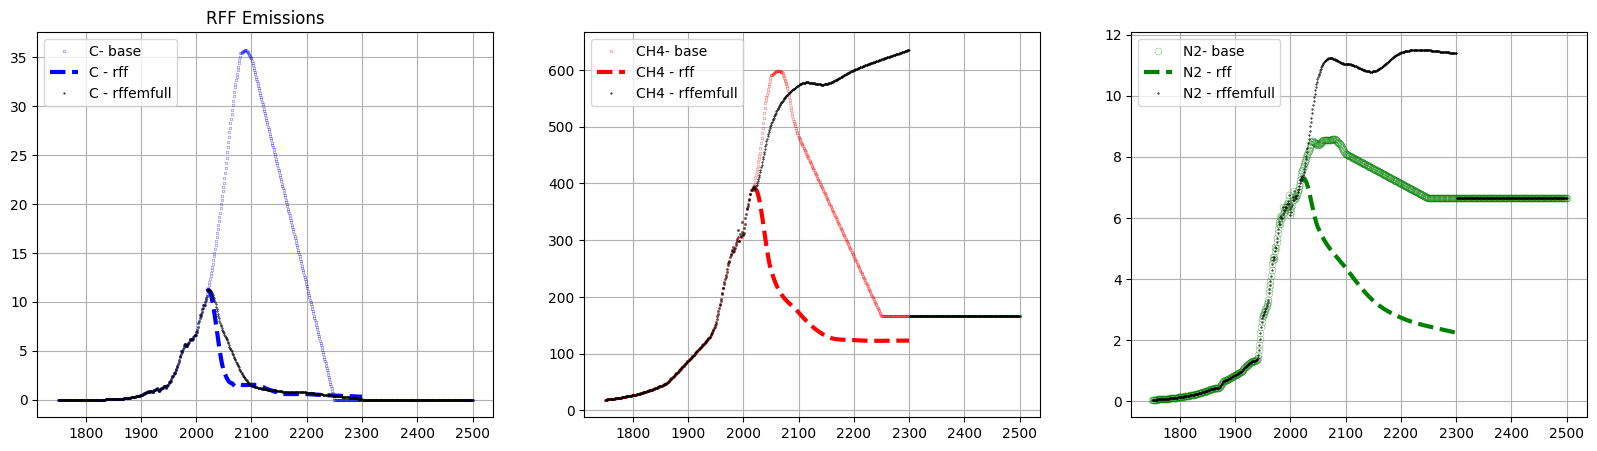

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# ===========> PLOT emis
ax0=axs[0]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["C"]],'ob',label='C- base', mfc='none', mew=.2, ms=2);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["C"],rffspIDX,:],'--b',label='C - rff', mfc='none', mew=.2, lw=3);
#rffemfull_array
ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["C"]],'.k',label='C - rffemfull', mfc='none', mew=1, ms=1);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)



# ===========> PLOT emis
ax0=axs[1]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["CH4"]],'or',label='CH4- base', mfc='none', mew=.2, ms=2);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["CH4"],rffspIDX,:],'--r',label='CH4 - rff', mfc='none', mew=.2, lw=3);
# rffemfull_array
ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["CH4"]],'.k',label='CH4 - rffemfull', mfc='none', mew=1, ms=1);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)


# ===========> PLOT emis
ax0=axs[2]
# emis -->
ax0.plot(emis[:,0] , emis[:,emisGASIDX["N2"]],'og',label='N2- base', mfc='none', mew=.2, ms=5);
# rffemissions
ax0.plot(rffemissions['Year'],rffemissions['emissions'][rffemissionsGASIDX["N2"],rffspIDX,:],'--g',label='N2 - rff', mfc='none', mew=.2, lw=3);
# rffemfull_array
ax0.plot(rffemfull_array[sample,:,0],rffemfull_array[sample,:,emisGASIDX["N2"]],'.k',label='N2 - rffemfull', mfc='none', mew=1, ms=1);
# Ax properties
ax0.legend(loc="upper left"); 
axs[0].set_title(f'RFF Emissions'); ax0.grid(True)



---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Recalc above in nbk  </span> 

In [4]:
# Prep the RFF emissions
def prep_rff(baseem, rffemissions, rff_sp,REFERENCE_YEAR):
    """
        takes the raw RFF-SP emissions (rffemissions) and combines with background 
        emissions from ssprcp (baseem) for a given rff_sp
    """    
    # maps GHG gas to index in emissions numpy array
    idxdt = {
        "C": 1,
        "CH4": 3,
        "N2O": 4,
        "N2": 4,
    }
    styear = rffemissions.Year.values[0]
    enyear = rffemissions.Year.values[-1]

    # put the RFF-SP gases into the given background emissions 
    rffemfull = baseem.copy()
    for gas in rffemissions.gas.values:
        rffemfull[styear-REFERENCE_YEAR:enyear-REFERENCE_YEAR+1,idxdt[gas]] = rffemissions.sel(gas=gas,rff_sp=rff_sp).emissions.values

    return rffemfull

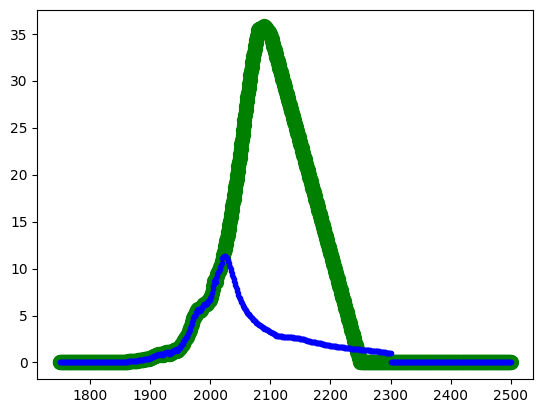

In [5]:
rffspIDX=2637
emis_rffsp_full1 = prep_rff(emis, rffemissions, rffspIDX, REFERENCE_YEAR)

plt.plot(emis[:,0] , emis[:,1],'.g',ms=20) 
plt.plot(emis_rffsp_full1[:,0] , emis_rffsp_full1[:,1], '.b')

---

<span style="font-size: 32pt; font-family: 'Times New Roman'; color: blue; "> Plot:: FaIR OP  </span> 

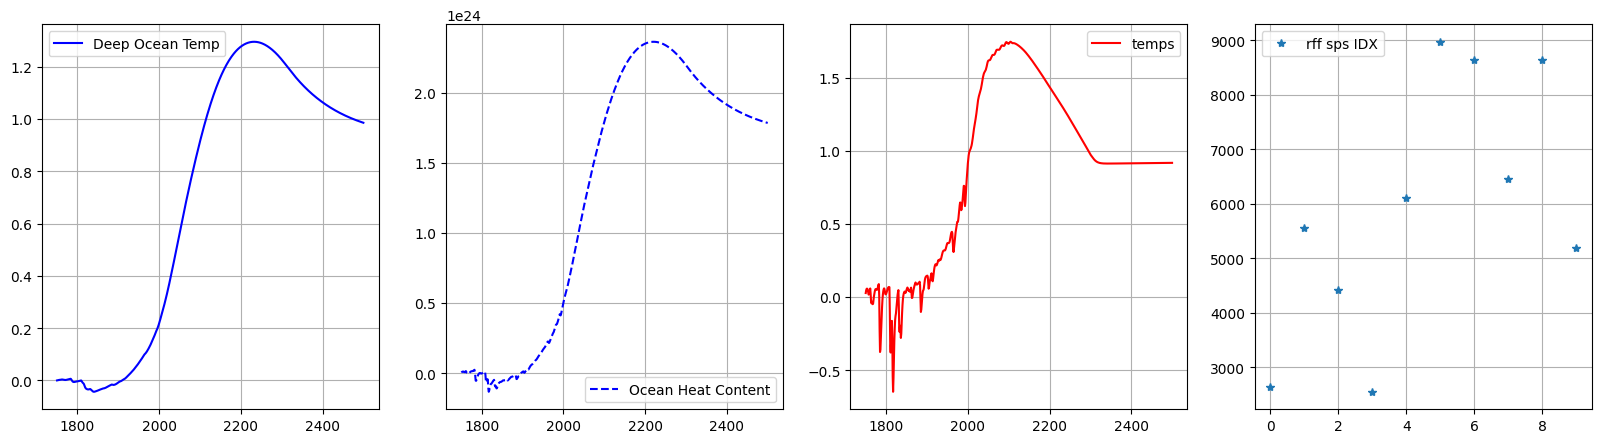

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(t,deeptemps[1,:],'-b',label='Deep Ocean Temp'); axs[0].grid(True)
axs[1].plot(t,ohcs[1,:],'--b', label='Ocean Heat Content'); axs[1].grid(True)
axs[2].plot(t,temps[1, :], '-r', label='temps'); axs[2].grid(True)
axs[3].plot(rff_sp_array[:], '*', label='rff sps IDX'); axs[3].grid(True)

axs[0].legend()  ; axs[1].legend(); axs[2].legend() ; axs[3].legend()


In [7]:
rff_sp_array[:]

array([2637, 5557, 4411, 2548, 6099, 8971, 8637, 6460, 8638, 5185])

---

<span style="font-size: 12pt; font-family: 'Times New Roman'; color: blue; "> Plot  </span> 

---

# Gas Species 

In [8]:
species = [
    'CO2|MAGICC Fossil and Industrial', 'CO2|MAGICC AFOLU', 'CH4', 'N2O', 'Sulfur', 'CO', 
    'VOC', 'NOx', 'BC', '|OC', 'NH3', 'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 
    'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a', 'HFC227ea', 'HFC245fa', 'SF6', 
    'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 'CCl4', 'CH3CCl3', 'HCFC22', 
    'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 'Halon1301', 'Halon2402', 
    'CH3Br', '|CH3Cl'
]

list_of_emissions_species = [
    'CO2_Fossil', 'CO2_Land', 'CH4', 'N2O', 'SOx', 'CO', 'NMVOC', 'NOx', 'BC', 'OC', 'NH3',
    'CF4', 'C2F6', 'C6F14', 'HFC23', 'HFC32', 'HFC4310mee', 'HFC125', 'HFC134a', 'HFC143a',
    'HFC227ea', 'HFC245fa', 'SF6', 'CFC11', 'CFC12', 'CFC113', 'CFC114', 'CFC115', 
    'CARB_TET', 'MCF', 'HCFC22', 'HCFC141b', 'HCFC142b', 'Halon1211', 'Halon1202', 
    'Halon1301', 'Halon2402', 'CH3Br', 'CH3Cl'
]

# Ensure both lists are of the same length
assert len(species) == len(list_of_emissions_species), "Lists must be of the same length"

# Generate the markdown table
table_md = "| Index | Species                               | Emissions Species     |\n"
table_md += "|-------|---------------------------------------|------------------------|\n"
for i, (sp, es) in enumerate(zip(species, list_of_emissions_species)):
    table_md += f"| {i+1}     | {sp:<35} | {es:<20} |\n"

# Print the markdown table
print(table_md)

# Display the total count
print(f"\n**Total species count: {len(species)}**")


| Index | Species                               | Emissions Species     |
|-------|---------------------------------------|------------------------|
| 1     | CO2|MAGICC Fossil and Industrial    | CO2_Fossil           |
| 2     | CO2|MAGICC AFOLU                    | CO2_Land             |
| 3     | CH4                                 | CH4                  |
| 4     | N2O                                 | N2O                  |
| 5     | Sulfur                              | SOx                  |
| 6     | CO                                  | CO                   |
| 7     | VOC                                 | NMVOC                |
| 8     | NOx                                 | NOx                  |
| 9     | BC                                  | BC                   |
| 10     | |OC                                 | OC                   |
| 11     | NH3                                 | NH3                  |
| 12     | CF4                                 | CF4                

##### Full list

In [9]:
variables = [
    'Emissions|BC', 'Emissions|CH4', 'Emissions|CO', 'Emissions|CO2',
    'Emissions|CO2|MAGICC AFOLU', 'Emissions|CO2|MAGICC Fossil and Industrial',
    'Emissions|F-Gases|HFC|HFC125', 'Emissions|F-Gases|HFC|HFC134a',
    'Emissions|F-Gases|HFC|HFC143a', 'Emissions|F-Gases|HFC|HFC227ea',
    'Emissions|F-Gases|HFC|HFC23', 'Emissions|F-Gases|HFC|HFC245fa',
    'Emissions|F-Gases|HFC|HFC32', 'Emissions|F-Gases|HFC|HFC4310mee',
    'Emissions|F-Gases|PFC|C2F6', 'Emissions|F-Gases|PFC|C6F14',
    'Emissions|F-Gases|PFC|CF4', 'Emissions|F-Gases|SF6',
    'Emissions|Montreal Gases|CCl4', 'Emissions|Montreal Gases|CFC|CFC11',
    'Emissions|Montreal Gases|CFC|CFC113', 'Emissions|Montreal Gases|CFC|CFC114',
    'Emissions|Montreal Gases|CFC|CFC115', 'Emissions|Montreal Gases|CFC|CFC12',
    'Emissions|Montreal Gases|CH3Br', 'Emissions|Montreal Gases|CH3CCl3',
    'Emissions|Montreal Gases|CH3Cl', 'Emissions|Montreal Gases|HCFC141b',
    'Emissions|Montreal Gases|HCFC142b', 'Emissions|Montreal Gases|HCFC22',
    'Emissions|Montreal Gases|Halon1202', 'Emissions|Montreal Gases|Halon1211',
    'Emissions|Montreal Gases|Halon1301', 'Emissions|Montreal Gases|Halon2402',
    'Emissions|N2O', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
    'Emissions|Sulfur', 'Emissions|VOC', 'Emissions|BC|MAGICC AFOLU',
    'Emissions|BC|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|BC|MAGICC AFOLU|Agriculture', 'Emissions|BC|MAGICC AFOLU|Forest Burning',
    'Emissions|BC|MAGICC AFOLU|Grassland Burning', 'Emissions|BC|MAGICC AFOLU|Peat Burning',
    'Emissions|BC|MAGICC Fossil and Industrial', 'Emissions|BC|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|BC|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|BC|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|BC|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|BC|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|BC|MAGICC Fossil and Industrial|Waste', 'Emissions|CH4|MAGICC AFOLU',
    'Emissions|CH4|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CH4|MAGICC AFOLU|Agriculture', 'Emissions|CH4|MAGICC AFOLU|Forest Burning',
    'Emissions|CH4|MAGICC AFOLU|Grassland Burning', 'Emissions|CH4|MAGICC AFOLU|Peat Burning',
    'Emissions|CH4|MAGICC Fossil and Industrial',
    'Emissions|CH4|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CH4|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CH4|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CH4|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CH4|MAGICC Fossil and Industrial|Waste',
    'Emissions|CO2|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO2|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO2|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO2|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO2|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO2|MAGICC Fossil and Industrial|Waste', 'Emissions|CO|MAGICC AFOLU',
    'Emissions|CO|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|CO|MAGICC AFOLU|Agriculture', 'Emissions|CO|MAGICC AFOLU|Forest Burning',
    'Emissions|CO|MAGICC AFOLU|Grassland Burning', 'Emissions|CO|MAGICC AFOLU|Peat Burning',
    'Emissions|CO|MAGICC Fossil and Industrial', 'Emissions|CO|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|CO|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|CO|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|CO|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|CO|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|CO|MAGICC Fossil and Industrial|Waste', 'Emissions|F-Gases|HFC|HFC152a',
    'Emissions|F-Gases|HFC|HFC236fa', 'Emissions|F-Gases|HFC|HFC365mfc', 'Emissions|F-Gases|NF3',
    'Emissions|F-Gases|PFC|C3F8', 'Emissions|F-Gases|PFC|C4F10', 'Emissions|F-Gases|PFC|C5F12',
    'Emissions|F-Gases|PFC|C7F16', 'Emissions|F-Gases|PFC|C8F18', 'Emissions|F-Gases|PFC|cC4F8',
    'Emissions|F-Gases|SO2F2', 'Emissions|Montreal Gases|CH2Cl2', 'Emissions|Montreal Gases|CHCl3',
    'Emissions|N2O|MAGICC AFOLU', 'Emissions|N2O|MAGICC Fossil and Industrial',
    'Emissions|NH3|MAGICC AFOLU', 'Emissions|NH3|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NH3|MAGICC AFOLU|Agriculture', 'Emissions|NH3|MAGICC AFOLU|Forest Burning',
    'Emissions|NH3|MAGICC AFOLU|Grassland Burning', 'Emissions|NH3|MAGICC AFOLU|Peat Burning',
    'Emissions|NH3|MAGICC Fossil and Industrial', 'Emissions|NH3|MAGICC Fossil and Industrial|Aircraft',
    'Emissions|NH3|MAGICC Fossil and Industrial|Energy Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Industrial Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|International Shipping',
    'Emissions|NH3|MAGICC Fossil and Industrial|Residential Commercial Other',
    'Emissions|NH3|MAGICC Fossil and Industrial|Solvents Production and Application',
    'Emissions|NH3|MAGICC Fossil and Industrial|Transportation Sector',
    'Emissions|NH3|MAGICC Fossil and Industrial|Waste', 'Emissions|NOx|MAGICC AFOLU',
    'Emissions|NOx|MAGICC AFOLU|Agricultural Waste Burning',
    'Emissions|NOx|MAGICC AFOLU|Agriculture', 'Emissions|NOx|MAGICC AFOLU|Forest Burning',
    'Emissions|NOx|MAGICC AFOLU|Grassland Burning', 'Emissions|NOx|MAGICC AFOLU|Peat Burning',
    'Emissions|NOx|MAGICC Fossil and Industrial', 'Emissions|NOx|MAGICC Fossil and Industrial|Aircraft',
]

# Generate the markdown table
table_md = "| Index | Variable                             |\n"
table_md += "|-------|--------------------------------------|\n"

for i, var in enumerate(variables):
    table_md += f"| {i}     | {var} |\n"

# Print the markdown table
print(table_md)

| Index | Variable                             |
|-------|--------------------------------------|
| 0     | Emissions|BC |
| 1     | Emissions|CH4 |
| 2     | Emissions|CO |
| 3     | Emissions|CO2 |
| 4     | Emissions|CO2|MAGICC AFOLU |
| 5     | Emissions|CO2|MAGICC Fossil and Industrial |
| 6     | Emissions|F-Gases|HFC|HFC125 |
| 7     | Emissions|F-Gases|HFC|HFC134a |
| 8     | Emissions|F-Gases|HFC|HFC143a |
| 9     | Emissions|F-Gases|HFC|HFC227ea |
| 10     | Emissions|F-Gases|HFC|HFC23 |
| 11     | Emissions|F-Gases|HFC|HFC245fa |
| 12     | Emissions|F-Gases|HFC|HFC32 |
| 13     | Emissions|F-Gases|HFC|HFC4310mee |
| 14     | Emissions|F-Gases|PFC|C2F6 |
| 15     | Emissions|F-Gases|PFC|C6F14 |
| 16     | Emissions|F-Gases|PFC|CF4 |
| 17     | Emissions|F-Gases|SF6 |
| 18     | Emissions|Montreal Gases|CCl4 |
| 19     | Emissions|Montreal Gases|CFC|CFC11 |
| 20     | Emissions|Montreal Gases|CFC|CFC113 |
| 21     | Emissions|Montreal Gases|CFC|CFC114 |
| 22     | Emissions|M